In [9]:
import numpy as np
import random


X=[14,16.5,19,18.5,15]
#X=[10,12,14,16,20]
alphas= [-0.82,0.52,0.2,0.45,0.9]
#alphas=[-0.25,-0.125,0.1,0.125,0.25]

Max_samples =50
for i in range(5,Max_samples):
    np.random.seed(0)
    noise = np.random.normal(0,0.1,1)
    x_new =  alphas[0]*X[i-1]+ alphas[1]*X[i-2]+ alphas[2]*X[i-3]+ alphas[3]*X[i-4]+ alphas[4]*X[i-5]+noise
    X.append(np.round(x_new,2))

print(len(X))

50


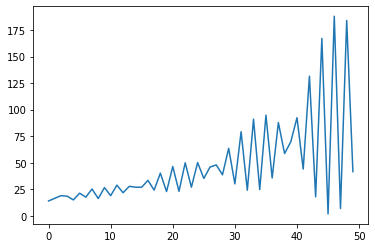

In [10]:
import matplotlib.pyplot as plt

plt.plot(list(range(50)), X)
plt.show()

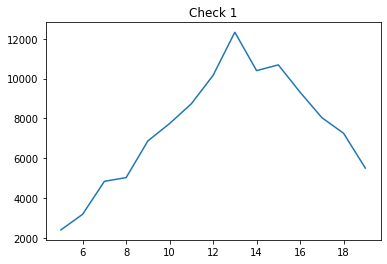

In [17]:
def dataWithW(w_optimal, x, d):
    Errors=[]
    for i in range(5,50):
        Errors.append((X[i]-np.dot(w_optimal,x))**2)
    e = np.mean(np.asarray(Errors))
    return e
            
        
MSE_Error=[]
weights_d = []
for d in range(5,20):
    w=np.zeros(d)
    Eta= 0.0001
    for epoch in range(100):
        ErrorObs=[]
        for i in range(5,Max_samples):
            x=X[:d]
            Delj = (2*X[i]-np.dot(w,x))*x
            wnew = w+Eta*Delj
            w=wnew/np.max(wnew)
            Err= (X[i]-np.dot(w,x))**2
            ErrorObs.append(Err)
  
    w_optimal =w
    weights_d.append(w_optimal)
    e = dataWithW(w_optimal, X[:d], d)
    MSE_Error.append(e)
d = list(range(5,20))
plt.plot(d,MSE_Error)
plt.title("Check 1")
plt.show()

In [12]:
ypred=[]
for i in range(40,50):
    x=np.array([X[i-1],X[i-2],X[i-3],X[i-4],X[i-5]])
    x=x.reshape(5,)
    ypred.append(np.dot(x,weights_d[0]))
print(ypred)       
        

[299.7036842105263, 300.9884210526316, 308.88736842105266, 341.77078947368426, 316.4571052631579, 385.947105263158, 327.0905263157895, 428.33763157894737, 346.8176315789474, 463.0318421052632]


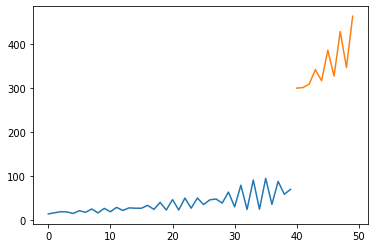

In [13]:
Xaxis= np.asarray(np.arange(0,50))
Yaxis = np.asarray(X)
#print(Xaxis.shape, Yaxis.shape)
plt.plot(Xaxis[:40], Yaxis[:40])
plt.plot(Xaxis[40:], np.asarray(ypred))
plt.show()